In [1]:
from pychomp import *
from pychomp.Braids import *

In [2]:
braid_diagram = BraidDiagram([[1,4,3,3,1,4,3,3,1], [2,1,2,1,2,1,2,1,2],
                              [3,3,1,4,3,3,1,4,3], [4,2,4,2,4,2,4,2,4]])

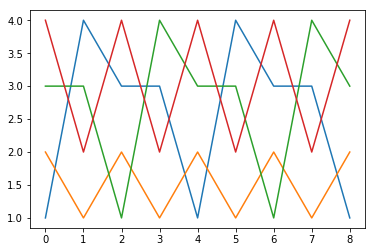

Braid Diagram

In [3]:
braid_diagram

In [4]:
%%time
braid_complex, braid_graph = BraidComplex(braid_diagram)

CPU times: user 1min 14s, sys: 1.4 s, total: 1min 15s
Wall time: 1min 16s


In [5]:
%%time
(poset, fibration) = ConleyMorseFibration(braid_complex, braid_graph)

CPU times: user 33 s, sys: 657 ms, total: 33.6 s
Wall time: 33.7 s


In [6]:
%%time
connection_matrix = ConnectionMatrix(fibration)

CPU times: user 34min 37s, sys: 10.9 s, total: 34min 48s
Wall time: 34min 41s


In [7]:
%%time
reduced_poset = Poset(InducedSubgraph(TransitiveClosure(poset), lambda v : v in connection_matrix.count()))

CPU times: user 3.16 s, sys: 68.6 ms, total: 3.23 s
Wall time: 3.22 s


In [8]:
%%time
df = DrawFibration(connection_matrix, reduced_poset)

CPU times: user 355 µs, sys: 10 µs, total: 365 µs
Wall time: 369 µs


In [9]:
with open('cm.gv','w') as outfile:
    outfile.write(df.graphviz())

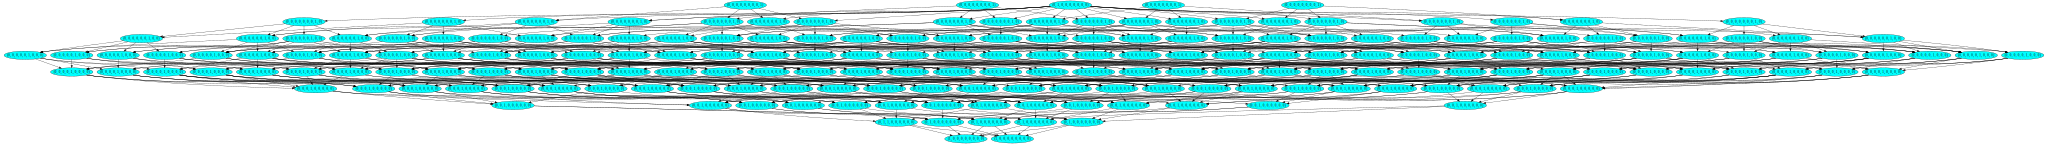

In [10]:
df

In [11]:
bd = lambda cell : connection_matrix.complex().boundary(cell)
C = connection_matrix.complex()
print("Connection Matrix Data")
print("======================")
for d in range(0,C.dimension()):
    print("  Boundaries of " + str(d) + "-cells in Connection Fibration:")
    for c in C(d):
        print("    " + str( c) + ' : ' + str(bd({c})))

Connection Matrix Data
  Boundaries of 0-cells in Connection Fibration:
    0 : set()
    1 : set()
  Boundaries of 1-cells in Connection Fibration:
    2 : {1}
    3 : {0, 1}
    4 : {0, 1}
    5 : {0, 1}
    6 : {0, 1}
    7 : {0, 1}
  Boundaries of 2-cells in Connection Fibration:
    8 : {3, 6}
    9 : {3, 4}
    10 : {3, 4}
    11 : {4, 6}
    12 : {5, 6}
    13 : {3, 5}
    14 : {4, 5}
    15 : {4, 5}
    16 : {6, 7}
    17 : {3, 7}
    18 : {3, 7}
    19 : {4, 7}
    20 : {5, 7}
    21 : set()
    22 : {5, 7}
  Boundaries of 3-cells in Connection Fibration:
    23 : {8, 10, 11, 21}
    24 : {8, 9, 11, 21}
    25 : {9, 10}
    26 : {8, 17, 16}
    27 : {11, 12, 14}
    28 : {16, 20, 12}
    29 : {9, 13, 14}
    30 : {10, 13, 14}
    31 : {11, 12, 15}
    32 : {8, 12, 13}
    33 : {10, 13, 15}
    34 : {14, 15}
    35 : {8, 21, 12, 13}
    36 : {18, 13, 22}
    37 : {16, 12, 22}
    38 : {19, 22, 14}
    39 : {8, 16, 18}
    40 : {17, 18}
    41 : {11, 16, 19}
    42 : {17, 10, 19

In [12]:
braid_complex.size()

429981696